In [241]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
from ipywidgets import interact,fixed,FloatSlider
from IPython.display import clear_output,display
import matplotlib.animation as animation
%matplotlib inline
cos=np.cos
sin=np.sin


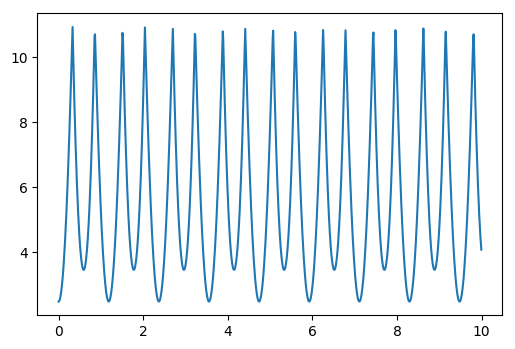

In [481]:
#http://matplotlib.org/examples/animation/double_pendulum_animated.html
def func(state,t):
    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    del_ = state[2] - state[0]
    den1 = (M1 + M2)*L1 - M2*L1*cos(del_)*cos(del_)
    dydx[1] = (M2*L1*state[1]*state[1]*sin(del_)*cos(del_) +
               M2*G*sin(state[2])*cos(del_) +
               M2*L2*state[3]*state[3]*sin(del_) -
               (M1 + M2)*G*sin(state[0]))/den1

    dydx[2] = state[3]

    den2 = (L2/L1)*den1
    dydx[3] = (-M2*L2*state[3]*state[3]*sin(del_)*cos(del_) +
               (M1 + M2)*G*sin(state[0])*cos(del_) -
               (M1 + M2)*L1*state[1]*state[1]*sin(del_) -
               (M1 + M2)*G*sin(state[2]))/den2

    return dydx
def onepend(y,t):
    theta1p=y[1]
    theta1pp=(-g/l1)*np.sin(y[0])
    return [theta1p,theta1pp]
G=9.8
L1=1
L2=1
M1=1
M2=1
y0=[np.pi/2,0]
t=np.arange(0,10,1e-2)
sol=spi.odeint(onepend,y0,t)
def downpi(n):    
    return  np.arctan2(np.sin(n), np.cos(n))

target=[0,0]
loss=np.sum((downpi(sol)-target)**2,axis=1)
plt.plot(t,loss)

## Plots

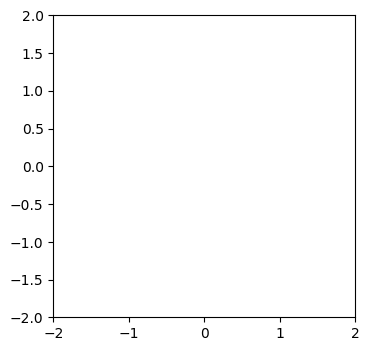

In [482]:
fig, ax = plt.subplots();
line,=plt.plot([],[]);
line2,=plt.plot([],[]);
plt.axis('scaled')
plt.xlim(-2,2)
plt.ylim(-2, 2)
def plotpend(i):
    #t=slider1.value
    y=sol[i,:]       
    x1=-l1*np.sin(y[0])
    y1=-l1*np.cos(y[0])
    line.set_data([0,x1],[0,y1])
    if(len(sol)==4):
        x2=-l2*np.sin(y[2])+x1
        y2=-l2*np.cos(y[2])+y1   
        line2.set_data([x2,x1],[y2,y1])
        return line,line2,
    return line,
def init():    
    line.set_data([], [])
    if(len(sol)==4):
        line2.set_data([], [])
        return line,line2,
    return line,
# slider1 = FloatSlider(description='time', min=0, max=1, step=0.1)
# slider1.on_trait_change(plotpend, 't')
# display(slider1)

HTML(animation.FuncAnimation(fig,plotpend,frames=100,
                             init_func=init,interval=50,blit=0).to_html5_video())

## Energy conservation

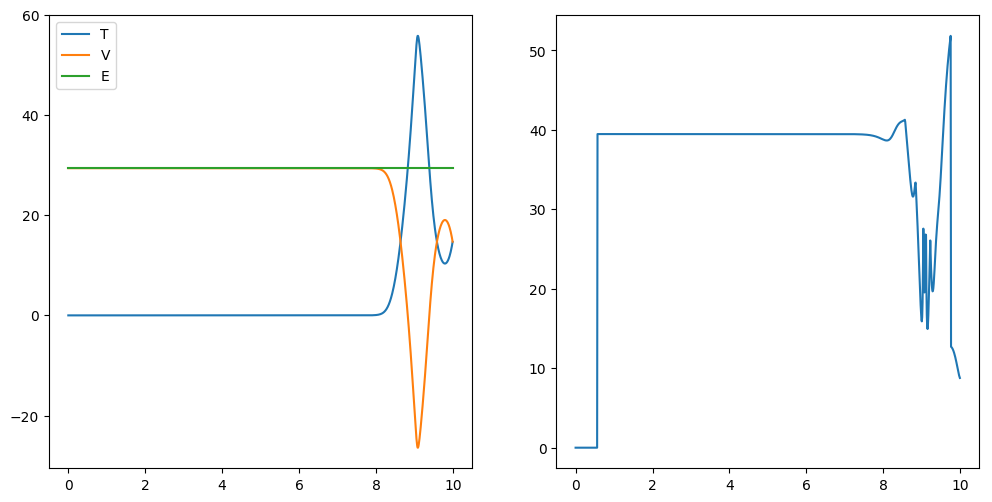

In [473]:
V=-summ*G*l1*cos(sol[:,0])-M2*G*L2*cos(sol[:,2])
T=0.5*M1*L1*L1*sol[:,1]*sol[:,1]+0.5*M2*(L1*L1*sol[:,1]*sol[:,1]+
                                        L2*L2*sol[:,3]*sol[:,3]+
                                        2*L1*l2*sol[:,1]*sol[:,3]*cos(sol[:,0]
                                                                      -sol[:,2]))
E=T+V
#pi is also pi,3pi, etc

#print((downpi(sol)-target)**2)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(t,T,label='T')
plt.plot(t,V,label='V')
plt.plot(t,E,label='E')
plt.legend()
plt.subplot(1,2,2)
plt.plot(t,loss)
